--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
AnnData object with n_obs × n_vars = 7000 × 27998
    var: 'gene_ids'


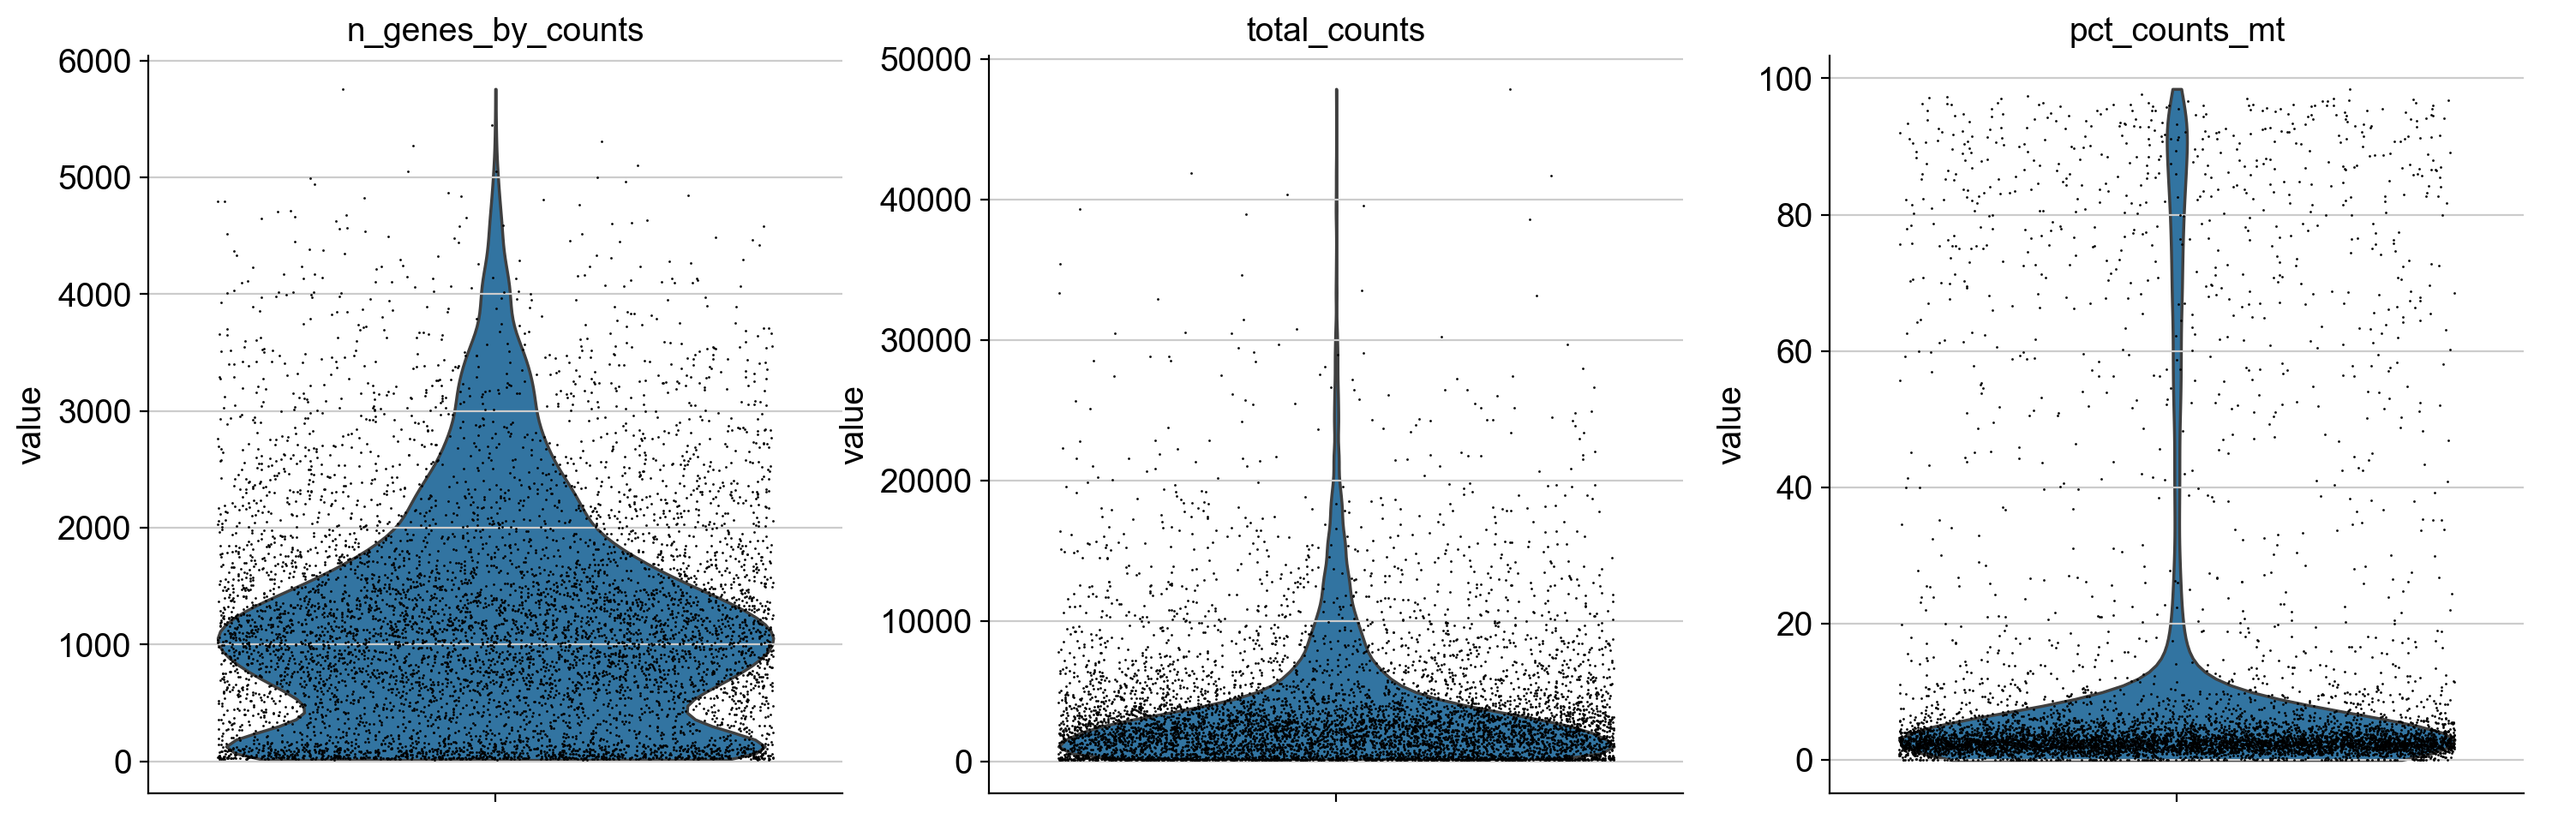

View of AnnData object with n_obs × n_vars = 5191 × 27998
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Number of HVGs: 2784


/Users/travishong/miniforge3/envs/marrow-niche/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/travishong/miniforge3/envs/marrow-niche/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/travishong/miniforge3/envs/marrow-niche/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:08)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


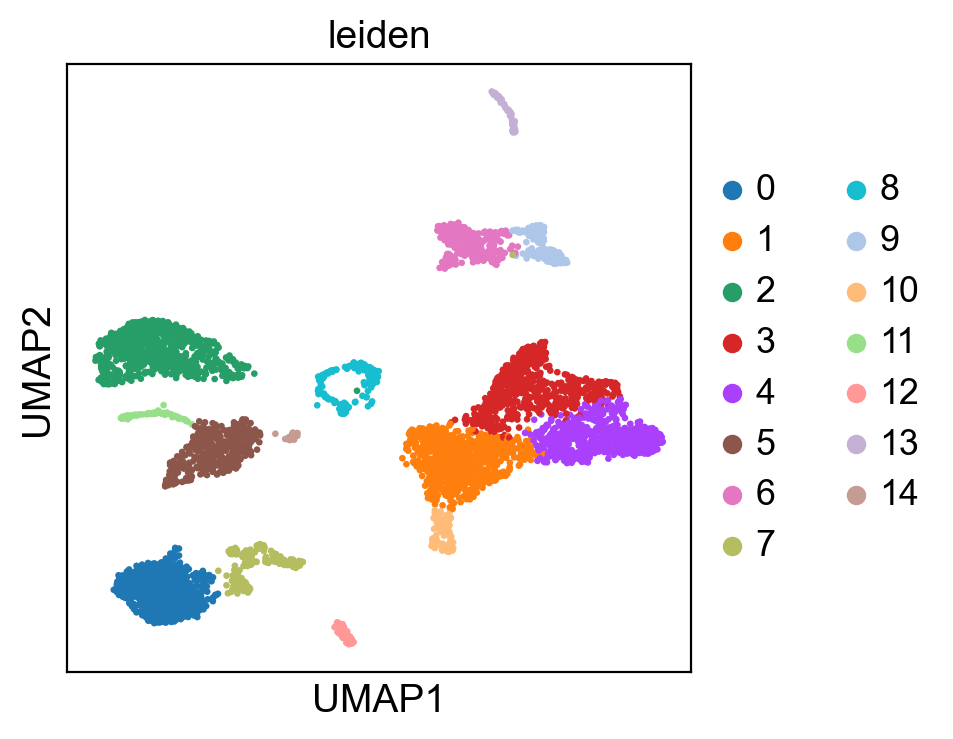

In [15]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, facecolor="white")

data_dir = "../data/mouse/ctrl_10May/"

adata = sc.read_10x_mtx(
    data_dir,
    var_names="gene_symbols",
    cache=False
)
print(adata)

adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, inplace=True)

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

adata = adata[adata.obs["n_genes_by_counts"] > 500, :]
adata = adata[adata.obs["pct_counts_mt"] < 15, :]

print(adata)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.raw = adata 

sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
)

print("Number of HVGs:", adata.var["highly_variable"].sum())

adata = adata[:, adata.var["highly_variable"]] 
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

sc.pl.umap(adata, color=["leiden"])

adata.write_h5ad("../data/mouse/mouse_stroma_processed.h5ad")


In [16]:
adata.raw = adata

In [7]:
adata.var["gene_symbols"] = adata.var_names
adata.var.head()

,gene_ids,gene_symbols
Xkr4,ENSMUSG00000051951,Xkr4
Gm1992,ENSMUSG00000089699,Gm1992
Gm37381,ENSMUSG00000102343,Gm37381
Rp1,ENSMUSG00000025900,Rp1
Rp1-1,ENSMUSG00000109048,Rp1-1


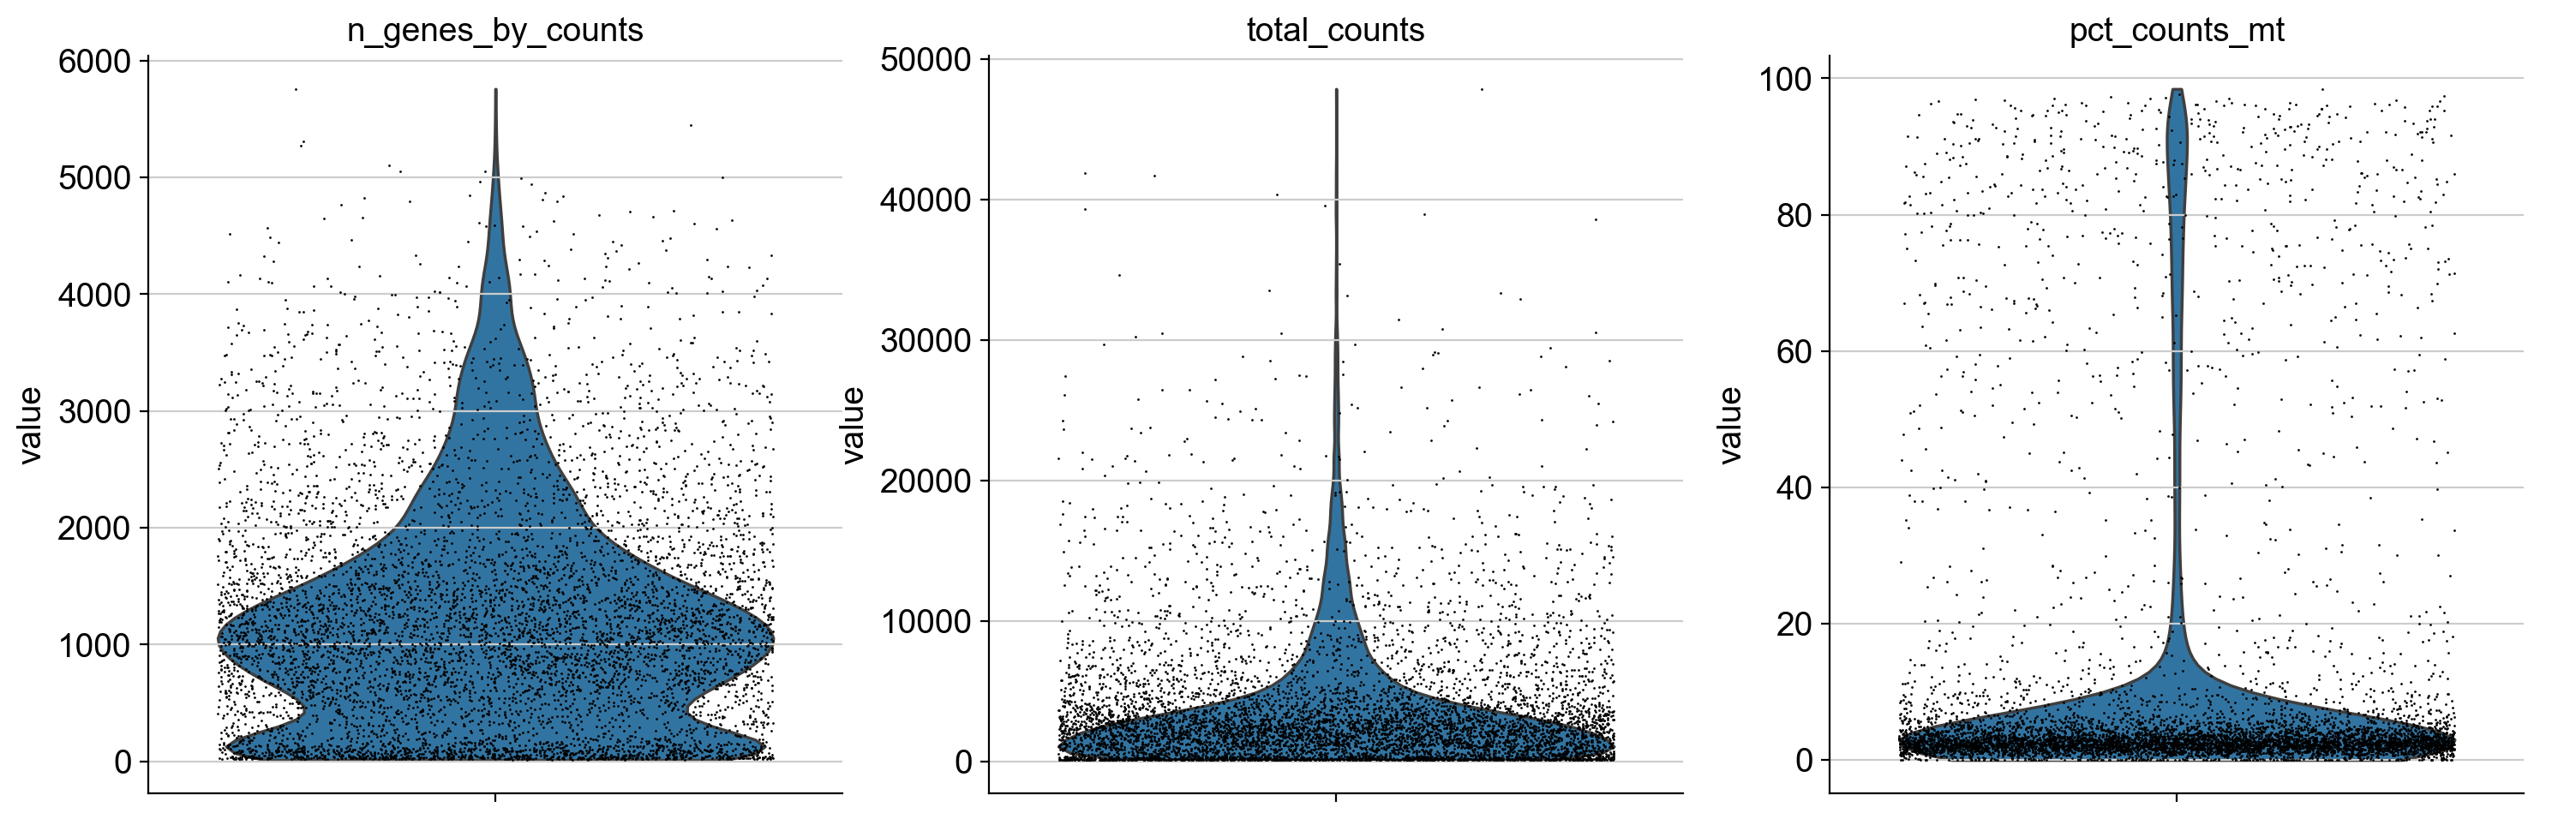

In [8]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")

sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, inplace=True)

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)


In [9]:
adata = adata[adata.obs["n_genes_by_counts"] > 500, :]
adata = adata[adata.obs["pct_counts_mt"] < 15, :]

adata


View of AnnData object with n_obs × n_vars = 5191 × 27998
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5
)

print("Number of HVGs:", adata.var["highly_variable"].sum())

adata = adata[:, adata.var["highly_variable"]]

adata


normalizing counts per cell


/Users/travishong/miniforge3/envs/marrow-niche/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:01)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Number of HVGs: 2784


View of AnnData object with n_obs × n_vars = 5191 × 2784
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

computing PCA
    with n_comps=50
    finished (0:00:01)


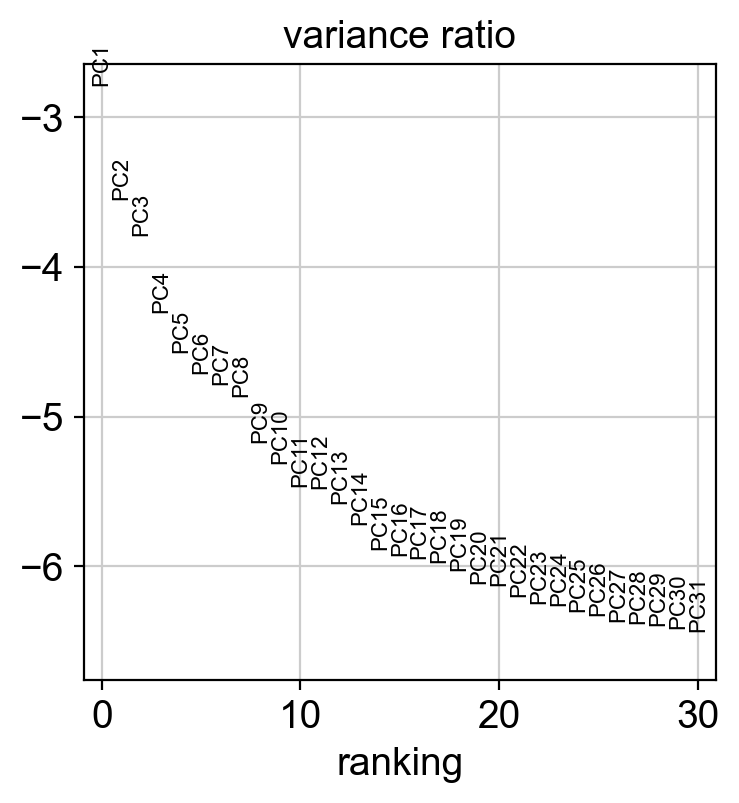

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:08)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/var/folders/q0/x3z79whd4d7_w9l830kmgr1r0000gn/T/ipykernel_54078/2941810089.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


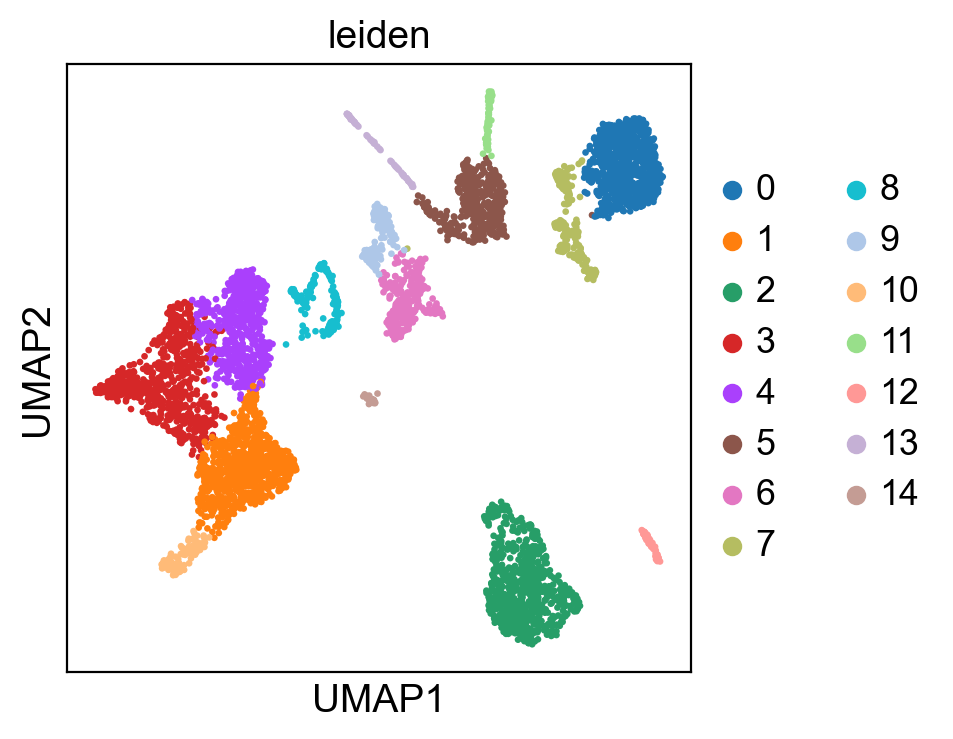

In [13]:
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

sc.pl.umap(adata, color=["leiden"])


In [14]:
adata.write_h5ad("../data/mouse/mouse_stroma_processed.h5ad")